<a href="https://colab.research.google.com/github/krisnaaulia17/Pengembangan-Digital-Marketing/blob/master/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web Scraping Dinamis 

Penulis: Krisna Aulia (IPB University)


---

Program di bawah ini dibuat untuk melakukan *Web Scraping* secara dinamis menggunakan library `selenium` sebagai pengganti user dalam melakukan browsing.

Disarankan untuk mendownload terlebih dahulu WebDriver yang sesuai dengan kebutuhan. Pada tulisan ini, penulis menggunakan ChromeWebDriver yang diunduh melalui [link ini](https://chromedriver.chromium.org/downloads). Sesuaikan versi dari Webdriver dengan Browser yang anda gunakan.

Penulis menggunakan Sublime Text 3 dalam membuat program dan menjalankan program menggunakan command prompt sehingga tidak dapat memperlihatkan output pada repository ini.

##Flow Chart Web Scraping
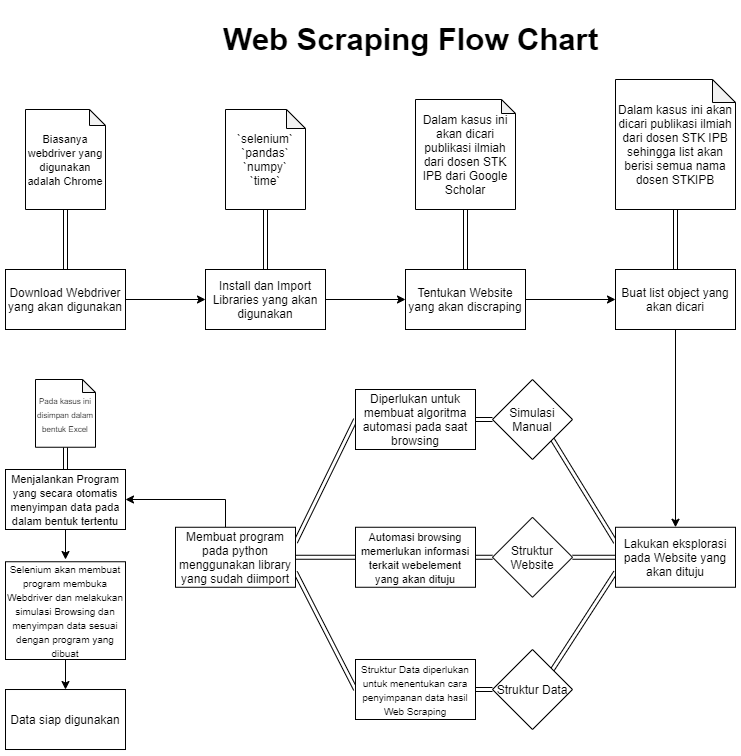

1. Install dan Import library yang akan digunakan

In [ ]:
!pip install selenium #menginstall library yang dibutuhkan

In [2]:
#mengimport library yang akan digunakan
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys
import time
import numpy as np 
import pandas as pd

2. Mendefinisikan website yang dituju dan objek yang akan dicari

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
url = "https://scholar.google.com/"

cari = ["anang kurnia", "bagus sartono", 
		"ahmad ansori mattjik","aji wigena", 
		"khairil anwar notodiputro", "asep saefuddin",
		"hari wijayanto", "muhammad nur aidi", 
		"anik djuraidah","i made sumertajaya", 
		"kusman sadik", "farit m afendi",
		"agus m soleh", "utami syafitri",
		"anwar fitrianto","itasia dina sulvianti",
		"mohammad masjkur", "aam alamudi",
		"yenni angraini", "pika silvianti", 
		"cici suhaeni","rahma anisa",
		"septian rahardiantoro", "gerry alfa dito"]
#untuk pak Budi Susetyo dan bu Indahwati, lakukan pencarian manual dengan command prompt agar dapat dilakukan ekstraksi dengan webdriver secara langsung

3. Membuat program yang disesuaikan dengan simulasi manual dan struktur website.

In [ ]:
driver = webdriver.Chrome(PATH) #membuat variable driver yang akan menjadi 'kendaraan' pada saat browsing
driver.get(url) #memasukkan url website yang dituju
driver.implicitly_wait(30) #membuat browser menunggu paling lama 30 detik sampai semua element pada website muncul


#Opsional untuk login pada sebuah akun atau tidak. Ini hanya untuk menyiasati agar tidak mudah dideteksi sebagai bot
#driver.find_element_by_id('gs_hdr_act_s').click()
#email = driver.find_element_by_id('identifierId')
#email.send_keys('dmstkipb@gmail.com')
#email.send_keys(Keys.RETURN)

#pw = driver.find_element_by_name('password')
#pw.send_keys('statistikasatu')
#pw.send_keys(Keys.RETURN)

result = [] #memubuat variabel wadah untuk menyimpan data hasil pencarian
for i in cari: #membuat looping yang akan melakukan pencarian sesuai dengan objek yang ada pada list dan langsung menyimpannya pada variabel result

	search = driver.find_element_by_name("q")
	search.send_keys(i)
	search.send_keys(Keys.RETURN)


	akun = driver.find_element_by_xpath("//h4/a/b")
	akun.click()

	driver.find_element_by_id("gsc_bpf_more").click()
	time.sleep(2)

	ambil = driver.find_elements(By.XPATH, "//*[@id='gsc_a_b']/tr")
	for i in ambil:
		result.append(str(i.text))
	
	driver.back()
	driver.back()

hasil = [i.split('\n') for i in result]
print(hasil)
len(hasil)

kurang = [index for index in range(len(hasil)) if len(hasil[index]) < 4]
lebih = [index for index in range(len(hasil)) if len(hasil[index]) > 4]

for i in kurang:
	hasil[i].insert(2,'')

for i in lebih:
	ganti = '*'
	menjadi = ' '
	coba_ganti = [j for j, x in enumerate(hasil[i]) if x == ganti]
	for j in coba_ganti:
		hasil[i][j] = menjadi
	hasil[i][3:6] = [''.join(hasil[i][3:6])]


df = pd.DataFrame(hasil, columns=['Judul', 'Penulis', 'Jurnal', 'Sitasi-Tahun'])
df.to_excel("hasil9.xlsx", index=False)
dfclean = df.drop_duplicates(subset='Judul', keep='first')
dfclean.to_excel("hasilbersih4.xlsx")
driver.quit()

##Catatan

Terkadang ketika telalu sering menjalankan program, terkadang Website dapat mendeteksi kita sebagai bot sehingga butuh sekitar 24 jam untuk membuat website 'melupakan' ingatan bahwa kita adalah bot.